In [1]:
!pip install kaggle
!mkdir .kaggle
import json
import zipfile
import os
from pathlib import Path
api_token = {"username":"ratchaphonp",
             "key":"9ce222230cae5d8fadeaa490ee7d9e29"}
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_token,handl)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import get_file
from sklearn.metrics import roc_curve, auc, confusion_matrix
from imblearn.metrics import sensitivity_score, specificity_score

import os
import glob
import zipfile
import random

import shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
!kaggle datasets download -d ratchaphonp/model-for-image-final-project
!unzip model-for-image-final-project.zip

 99% 2.06G/2.08G [00:24<00:00, 83.4MB/s]
100% 2.08G/2.08G [00:24<00:00, 90.3MB/s]
Archive:  model-for-image-final-project.zip
  inflating: CNN.h5                  
  inflating: DenseNet201.h5          
  inflating: InceptionResNetV2.h5    
  inflating: ResNet50V2.h5           
  inflating: Xception.h5             


In [4]:
cnn = tf.keras.saving.load_model('/content/CNN.h5')
densenet = tf.keras.saving.load_model('/content/DenseNet201.h5')
inception = tf.keras.saving.load_model('/content/InceptionResNetV2.h5')
resnet = tf.keras.saving.load_model('/content/ResNet50V2.h5')
xception =tf.keras.saving.load_model('/content/Xception.h5')

In [5]:
from google.colab import files

In [6]:
def prediction(img_batch):
  cn = cnn.predict(img_batch)
  if cn < 0.5 :
    cnn_pred = 'Benign'
  else:
    cnn_pred = 'Malignant'
  dense = densenet.predict(img_batch)
  if dense < 0.5 :
    dense_pred = 'Benign'
  else:
    dense_pred = 'Malignant'
  incep = inception.predict(img_batch)
  if incep < 0.5 :
    incep_pred = 'Benign'
  else:
    incep_pred = 'Malignant'
  res = resnet.predict(img_batch)
  if res < 0.5 :
    resnet_pred = 'Benign'
  else:
    resnet_pred = 'Malignant'
  xcep = xception.predict(img_batch)
  if xcep < 0.5 :
    xcep_pred = 'Benign'
  else:
    xcep_pred = 'Malignant'
  com = (dense + incep + res + xcep) / 4
  if com <0.5 :
    com_pred = "Benign"
  else:
    com_pred = "Malignant"
  return cnn_pred, dense_pred, incep_pred, resnet_pred, xcep_pred, com_pred

Saving images.jpeg to images.jpeg
1/1 [==============================] - 0s 22ms/step


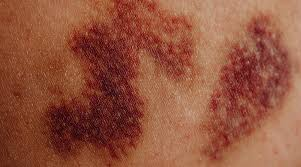

CNN: Benign
DenseNet201: Benign
Inception: Malignant
ResNet50V2: Malignant
Xception: Malignant
Combination all Model: Malignant


In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn 
  img = load_img(path, target_size=(256, 256))
  img_array = img_to_array(img)
  #img_array = img_array/255.
  img_batch = np.expand_dims(img_array, axis=0)   
  cnn_pred, dense_pred, incep_pred, resnet_pred, xcep_pred, com_pred = prediction(img_batch)
  display(Image(path))
  print(f"CNN: {cnn_pred}")
  print(f"DenseNet201: {dense_pred}")
  print(f"Inception: {incep_pred}")
  print(f"ResNet50V2: {resnet_pred}")
  print(f"Xception: {xcep_pred}")
  print(f"Combination all Model: {com_pred}")